In [1]:
import pandas as pd
import matplotlib as plt

In [9]:
colunas = ['NU_INSCRICAO', 'NU_ANO', 'TP_FAIXA_ETARIA', 'TP_SEXO',
       'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE',
       'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO',
       'IN_TREINEIRO', 'CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC',
       'CO_UF_ESC', 'SG_UF_ESC', 'TP_DEPENDENCIA_ADM_ESC',
       'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC', 'CO_MUNICIPIO_PROVA',
       'NO_MUNICIPIO_PROVA', 'CO_UF_PROVA', 'SG_UF_PROVA',
       'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'TP_PRESENCA_MT', 'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC',
       'CO_PROVA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC',
       'NU_NOTA_MT', 'TP_STATUS_REDACAO', 'NU_NOTA_COMP1',
       'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5',
       'NU_NOTA_REDACAO','Q001','Q002']

In [10]:
df = pd.read_csv('MICRODADOS_ENEM_2018.csv', sep=";", encoding='ISO-8859-1', usecols=colunas, nrows=10000)

In [11]:
# Selecionar apenas as colunas que interessam
colunasSel = ['NU_INSCRICAO','NU_NOTA_MT','NU_NOTA_REDACAO','Q001','Q002']

In [13]:
# Criar um novo DataFrame apenas com os dados que serão analisados
df2 = df.filter(items=colunasSel)

In [14]:
# Visualizar a cabeça do DataFrame
df2.head()

,NU_INSCRICAO,NU_NOTA_MT,NU_NOTA_REDACAO,Q001,Q002
0,180007186625,496.3,360.0,E,E
1,180007186627,440.6,420.0,D,E
2,180007186628,410.4,600.0,B,B
3,180007186629,711.5,800.0,F,F
4,180007186631,543.1,500.0,A,E


In [ ]:
# Q001 - Até que série seu pai, ou o homem responsável por você, estudou?
# Q002 - Até que série sua mãe, ou a mulher responsável por você, estudou?

In [15]:
# Criar um dicionário para visualizar melhor o resultado.
dict1 = {
    'A': 'Nunca estudou',
    'B': 'Não completou a 4ª série/5º ano do Ensino Fundamental',
    'C': 'Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental',
    'D': 'Completou a 8ª série/9º ano do Ensino Fundamental , mas não completou o Ensino Médio',
    'E': 'Completou o ensino Médio, mas não completou a Faculdade',
    'F': 'Completou a Faculdade, mas não completou a Pós-Graduação',
    'G': 'Completou a Pós-Graduação',
    'H': 'Não sei'
}

In [16]:
df2.filter(items=['Q001','NU_INSCRICAO']).groupby('Q001').count()

,NU_INSCRICAO
Q001,
A,578
B,2462
C,1486
D,1241
E,2499
F,530
G,251
H,953


In [23]:
# Inserindo coluna NO_Q001
df2['NO_Q001'] = [dict1[resp] for resp in df2.Q001]

In [25]:
# Inserindo coluna NO_Q002
df2['NO_Q002'] = [dict1[resp] for resp in df2.Q002]

In [26]:
df2.head()

,NU_INSCRICAO,NU_NOTA_MT,NU_NOTA_REDACAO,Q001,Q002,NO_Q001,NO_Q002
0,180007186625,496.3,360.0,E,E,"Completou o ensino Médio, mas não completou a ...","Completou o ensino Médio, mas não completou a ..."
1,180007186627,440.6,420.0,D,E,Completou a 8ª série/9º ano do Ensino Fundamen...,"Completou o ensino Médio, mas não completou a ..."
2,180007186628,410.4,600.0,B,B,Não completou a 4ª série/5º ano do Ensino Fund...,Não completou a 4ª série/5º ano do Ensino Fund...
3,180007186629,711.5,800.0,F,F,"Completou a Faculdade, mas não completou a Pós...","Completou a Faculdade, mas não completou a Pós..."
4,180007186631,543.1,500.0,A,E,Nunca estudou,"Completou o ensino Médio, mas não completou a ..."


In [35]:
# Distribuição dos candidatos do ENEM 2018 por escolaridade do pai
df2.filter(items=['NO_Q001','NU_INSCRICAO']).groupby('NO_Q001').count().sort_values('NU_INSCRICAO', ascending=False)

,NU_INSCRICAO
NO_Q001,
"Completou o ensino Médio, mas não completou a Faculdade",2499
Não completou a 4ª série/5º ano do Ensino Fundamental,2462
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental",1486
"Completou a 8ª série/9º ano do Ensino Fundamental , mas não completou o Ensino Médio",1241
Não sei,953
Nunca estudou,578
"Completou a Faculdade, mas não completou a Pós-Graduação",530
Completou a Pós-Graduação,251


In [37]:
# Distribuição dos candidatos do ENEM 2018 por escolaridade da mãe
df2.filter(items=['NO_Q002','NU_INSCRICAO']).groupby('NO_Q002').count().sort_values('NU_INSCRICAO', ascending=False)

,NU_INSCRICAO
NO_Q002,
"Completou o ensino Médio, mas não completou a Faculdade",3291
Não completou a 4ª série/5º ano do Ensino Fundamental,1905
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental",1488
"Completou a 8ª série/9º ano do Ensino Fundamental , mas não completou o Ensino Médio",1403
"Completou a Faculdade, mas não completou a Pós-Graduação",757
Completou a Pós-Graduação,501
Nunca estudou,404
Não sei,251


In [39]:
# Verificando o desempenho em Matemática segundo a escolaridade do pai
df2.filter(items=['NU_NOTA_MT','NO_Q001',]).groupby('NO_Q001').count().sort_values('NU_NOTA_MT', ascending=False)

,NU_NOTA_MT
NO_Q001,
"Completou o ensino Médio, mas não completou a Faculdade",1922
Não completou a 4ª série/5º ano do Ensino Fundamental,1686
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental",1086
"Completou a 8ª série/9º ano do Ensino Fundamental , mas não completou o Ensino Médio",939
Não sei,693
"Completou a Faculdade, mas não completou a Pós-Graduação",447
Nunca estudou,378
Completou a Pós-Graduação,220


In [40]:
# Verificando o desempenho em Matemática segundo a escolaridade da mãe
df2.filter(items=['NU_NOTA_MT','NO_Q002',]).groupby('NO_Q002').count().sort_values('NU_NOTA_MT', ascending=False)

,NU_NOTA_MT
NO_Q002,
"Completou o ensino Médio, mas não completou a Faculdade",2495
Não completou a 4ª série/5º ano do Ensino Fundamental,1269
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental",1047
"Completou a 8ª série/9º ano do Ensino Fundamental , mas não completou o Ensino Médio",1045
"Completou a Faculdade, mas não completou a Pós-Graduação",632
Completou a Pós-Graduação,431
Nunca estudou,274
Não sei,178


In [41]:
# Verificando o desempenho em Redação segundo a escolaridade do pai
df2.filter(items=['NU_NOTA_REDACAO','NO_Q001',]).groupby('NO_Q001').count().sort_values('NU_NOTA_REDACAO', ascending=False)

,NU_NOTA_REDACAO
NO_Q001,
"Completou o ensino Médio, mas não completou a Faculdade",2022
Não completou a 4ª série/5º ano do Ensino Fundamental,1802
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental",1158
"Completou a 8ª série/9º ano do Ensino Fundamental , mas não completou o Ensino Médio",989
Não sei,740
"Completou a Faculdade, mas não completou a Pós-Graduação",466
Nunca estudou,399
Completou a Pós-Graduação,224


In [42]:
# Verificando o desempenho em Redação segundo a escolaridade da mãe
df2.filter(items=['NU_NOTA_REDACAO','NO_Q002',]).groupby('NO_Q002').count().sort_values('NU_NOTA_REDACAO', ascending=False)

,NU_NOTA_REDACAO
NO_Q002,
"Completou o ensino Médio, mas não completou a Faculdade",2646
Não completou a 4ª série/5º ano do Ensino Fundamental,1362
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental",1123
"Completou a 8ª série/9º ano do Ensino Fundamental , mas não completou o Ensino Médio",1102
"Completou a Faculdade, mas não completou a Pós-Graduação",646
Completou a Pós-Graduação,441
Nunca estudou,286
Não sei,194


In [43]:
# Atribui o valor da Redação segundo a escolaridade da mãe a uma variável (q002_Redacao)
q002_Redacao = df2.filter(items=['NU_NOTA_REDACAO','NO_Q002',]).groupby('NO_Q002').count().sort_values('NU_NOTA_REDACAO', ascending=False)

<Axes: xlabel='NO_Q002'>

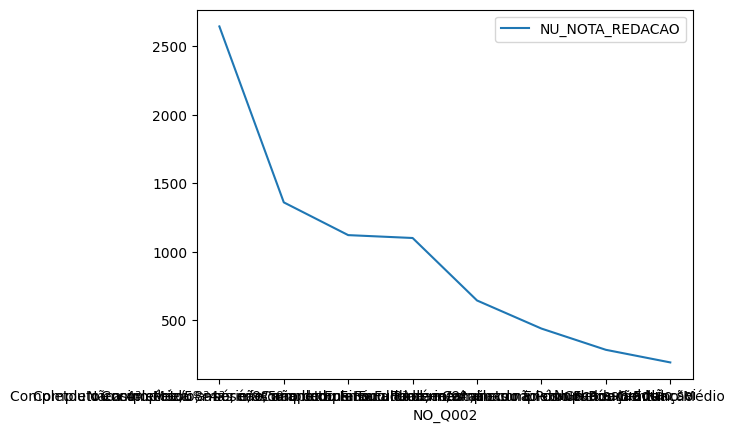

In [45]:
# Visualiza em um gráfico
q002_Redacao.plot()